In [130]:
# traitement des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pymongo import MongoClient
import datetime, time

In [131]:
client = MongoClient('mongodb://localhost:27017/')
db = client["meteo"]
collection = db["villes"]

print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'meteo')


In [132]:
#df = pd.DataFrame(list(collection.find()))
#df = pd.json_normalize(df)

data = collection.aggregate([{
    '$project': {
        '_id': 1, 
        'coord_lon': "$coord.lon",
        'coord_lat': "$coord.lat",
        'weather_id': "$weather.id",
        'weather_main': "$weather.main",
        'weather_description': "$weather.description",
        'weather_icon': "$weather.icon",
        'base': 1,
        'main_temp': "$main.temp",
        'main_feels_like': "$main.feels_like",
        'main_temp_min': "$main.temp_min",
        'main_temp_max': "$main.temp_max",
        'main_pressure': "$main.pressure",
        'main_humidity': "$main.humidity",
        'main_sea_level': "$main.sea_level",
        'main_grnd_level': "$main.grnd_level",
        'visibility': 1,
        'wind_speed': "$wind.speed",
        'wind_deg': "$wind.deg",
        'wind_gust': "$wind.gust",
        'clouds_all': "$clouds.all",
        'dt': 1,
        'sys_country': "$sys.country",
        'sys_sunrise': "$sys.sunrise",
        'sys_sunset': "$sys.sunset",
        'timezone': 1,
        'id': 1,
        'name': 1,
        'cod': 1}}])

data_list = list(data)
df = pd.DataFrame(data_list)

pd.set_option('display.max_columns', None)

df.shape

(35394, 29)

In [133]:
df.head()

,_id,base,visibility,dt,timezone,id,name,cod,coord_lon,coord_lat,weather_id,weather_main,weather_description,weather_icon,main_temp,main_feels_like,main_temp_min,main_temp_max,main_pressure,main_humidity,main_sea_level,main_grnd_level,wind_speed,wind_deg,wind_gust,clouds_all,sys_country,sys_sunrise,sys_sunset
0,6773f0d2ac01b99f7d4d4277,stations,10000.0,1735651448,3600,2967103,Peyrat-le-Château,200,1.7723,45.8158,[800],[Clear],[clear sky],[01d],8.57,8.57,8.57,8.57,1030,48,1030,968,1.11,246,1.55,0,FR,1735630447,1735661860
1,6773f0d2ac01b99f7d4d4278,stations,10000.0,1735651448,3600,2967108,Blaye,200,-0.6667,45.1333,[800],[Clear],[clear sky],[01d],8.61,7.44,8.61,8.61,1031,54,1031,1028,2.16,137,2.48,6,FR,1735630880,1735662597
2,6773f0d2ac01b99f7d4d4279,stations,10000.0,1735651449,3600,2967110,Zuydcoote,200,2.4934,51.0610,[804],[Clouds],[overcast clouds],[04d],6.35,2.54,4.99,6.68,1023,86,1023,1022,6.17,200,NaN,100,FR,1735631612,1735660349
3,6773f0d2ac01b99f7d4d427a,stations,10000.0,1735651449,3600,2967112,Zutkerque,200,2.0682,50.8530,[804],[Clouds],[overcast clouds],[04d],6.54,2.22,6.54,6.54,1023,72,1023,1016,7.86,224,14.54,100,FR,1735631654,1735660511
4,6773f0d2ac01b99f7d4d427b,stations,10000.0,1735651449,3600,2967125,Zonza,200,9.1710,41.7481,[800],[Clear],[clear sky],[01d],10.06,8.51,10.06,10.13,1030,53,1030,953,1.45,176,1.22,0,FR,1735627826,1735660928


In [134]:
df.describe()

,visibility,dt,timezone,id,cod,coord_lon,coord_lat,main_temp,main_feels_like,main_temp_min,main_temp_max,main_pressure,main_humidity,main_sea_level,main_grnd_level,wind_speed,wind_deg,wind_gust,clouds_all,sys_sunrise,sys_sunset
count,35355.000000,3.539400e+04,35394.0,3.539400e+04,35394.0,35394.000000,35394.000000,35394.000000,35394.000000,35394.000000,35394.000000,35394.000000,35394.000000,35394.000000,35394.000000,35394.000000,35394.000000,24331.000000,35394.000000,3.539400e+04,3.539400e+04
mean,9415.488219,1.735652e+09,3600.0,4.008662e+06,200.0,1.924670,46.743599,6.408468,4.498180,6.188433,6.685788,1028.704385,74.352941,1028.704385,999.371956,3.311995,173.721874,5.576522,52.447279,1.735631e+09,1.735662e+09
std,1955.300655,5.384899e+02,0.0,1.568989e+06,0.0,2.762517,2.172067,3.747537,4.452451,3.728624,3.766458,2.018589,16.821945,2.018589,31.297134,2.521818,77.681392,5.039624,45.498550,8.739361e+02,7.983275e+02
min,400.000000,1.735651e+09,3600.0,2.967103e+06,200.0,-4.770900,41.387400,-7.360000,-8.370000,-7.360000,-7.360000,1021.000000,9.000000,1021.000000,752.000000,0.000000,0.000000,0.010000,0.000000,1.735628e+09,1.735660e+09
25%,10000.000000,1.735652e+09,3600.0,2.988609e+06,200.0,-0.319100,44.950000,4.120000,0.620000,3.800000,4.450000,1028.000000,58.000000,1028.000000,994.000000,1.190000,122.000000,1.330000,0.000000,1.735630e+09,1.735661e+09
50%,10000.000000,1.735652e+09,3600.0,3.019340e+06,200.0,1.847800,46.787600,7.090000,4.810000,6.980000,7.270000,1029.000000,77.000000,1029.000000,1011.000000,2.570000,200.000000,2.780000,71.000000,1.735631e+09,1.735662e+09
75%,10000.000000,1.735653e+09,3600.0,6.427624e+06,200.0,3.843600,48.729100,9.080000,8.400000,8.910000,9.290000,1030.000000,89.000000,1030.000000,1018.000000,5.140000,219.000000,10.480000,100.000000,1.735631e+09,1.735662e+09
max,10000.000000,1.735654e+09,3600.0,8.015556e+06,200.0,9.522400,51.077900,16.030000,15.330000,15.980000,16.030000,1032.000000,100.000000,1032.000000,1031.000000,13.380000,360.000000,18.450000,100.000000,1.735633e+09,1.735663e+09


<AxesSubplot:ylabel='None'>

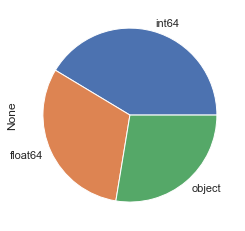

In [135]:
df.dtypes.value_counts().plot.pie()

In [136]:
# - on somme le nombre de valeurs manquantes
# - on divise par le nombre total de lignes
# - on trie par ordre décroissant
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

wind_gust              0.312567
visibility             0.001102
_id                    0.000000
main_feels_like        0.000000
sys_sunrise            0.000000
sys_country            0.000000
clouds_all             0.000000
wind_deg               0.000000
wind_speed             0.000000
main_grnd_level        0.000000
main_sea_level         0.000000
main_humidity          0.000000
main_pressure          0.000000
main_temp_max          0.000000
main_temp_min          0.000000
main_temp              0.000000
base                   0.000000
weather_icon           0.000000
weather_description    0.000000
weather_main           0.000000
weather_id             0.000000
coord_lat              0.000000
coord_lon              0.000000
cod                    0.000000
name                   0.000000
id                     0.000000
timezone               0.000000
dt                     0.000000
sys_sunset             0.000000
dtype: float64

<AxesSubplot:>

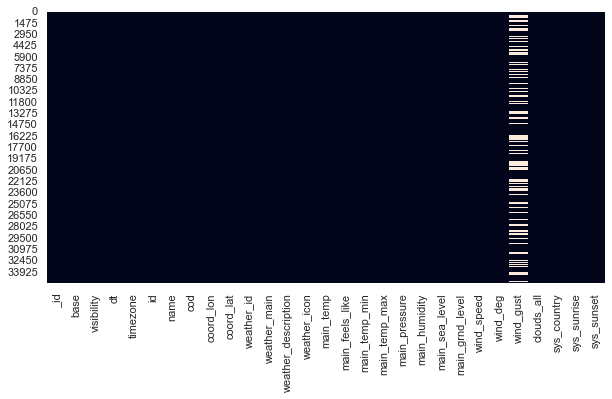

In [137]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.isna(), cbar = False)

In [138]:
print(df.columns)
print(df.dtypes)

Index(['_id', 'base', 'visibility', 'dt', 'timezone', 'id', 'name', 'cod',
       'coord_lon', 'coord_lat', 'weather_id', 'weather_main',
       'weather_description', 'weather_icon', 'main_temp', 'main_feels_like',
       'main_temp_min', 'main_temp_max', 'main_pressure', 'main_humidity',
       'main_sea_level', 'main_grnd_level', 'wind_speed', 'wind_deg',
       'wind_gust', 'clouds_all', 'sys_country', 'sys_sunrise', 'sys_sunset'],
      dtype='object')
_id                     object
base                    object
visibility             float64
dt                       int64
timezone                 int64
id                       int64
name                    object
cod                      int64
coord_lon              float64
coord_lat              float64
weather_id              object
weather_main            object
weather_description     object
weather_icon            object
main_temp              float64
main_feels_like        float64
main_temp_min          float64
main_temp_m

In [ ]:
df['dt'] = pd.to_datetime(df['dt'],unit='s')
df['dt'].head()

0    739251
1    739251
2    739251
3    739251
4    739251
Name: date_ordinal, dtype: int64

In [151]:
df['_id'] = df['_id'].astype('string')
df['base'] = df['base'].astype('string')
df['dt'] = df['dt'].astype('string')
df['name'] = df['name'].astype('string')
df['weather_main'] = df['weather_main'].astype('string')
df['weather_description'] = df['weather_description'].astype('string')

In [141]:
df.groupby('weather_main')['_id'].count()

weather_main
['Clear']      14281
['Clouds']     18710
['Drizzle']       76
['Fog']          423
['Mist']        1828
['Rain']          76
Name: _id, dtype: int64

Text(0.5, 1.0, "Nombre d'enregistrements par type de météo")

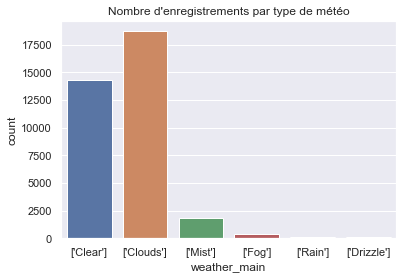

In [142]:
sns.set_theme(style = 'darkgrid')

type_meteo = sns.countplot(x = 'weather_main',  data = df)

# afficher les valeurs sur le graphique
#type_meteo.bar_label(type_meteo.containers[0])

plt.title("Nombre d'enregistrements par type de météo")

<AxesSubplot:xlabel='main_temp', ylabel='Count'>

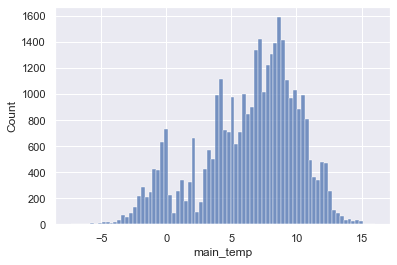

In [143]:
plt.figure()
sns.histplot(df['main_temp'])

<AxesSubplot:xlabel='wind_speed', ylabel='Count'>

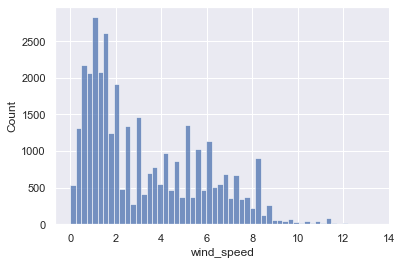

In [144]:
plt.figure()
sns.histplot(df['wind_speed'])

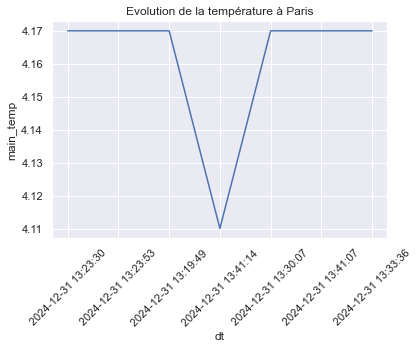

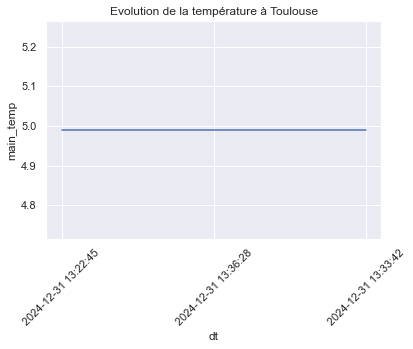

In [153]:
def temperature_par_ville(ville):
    df_filtered = df[df['name'] == ville]
    
    plt.figure()
    ax = sns.lineplot(data = df_filtered,
                 x = df_filtered['dt'],
                 y = df_filtered['main_temp'])
    
    ax.tick_params(axis = 'x', rotation = 45)

    plt.title("Evolution de la température à {}".format(ville))
    
temperature_par_ville('Paris')
temperature_par_ville('Toulouse')